# Data visualization

## Reading the data and seting imports


In [2]:
import pickle 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE

In [3]:
# Reading the data

with open ('../data/raw/mini_gm_public_v0.1.p', 'rb') as f:
    data = pickle.load(f)

In [4]:
# Flattening the data
# Iterate over the dictionary 
rows = []
for syndrome_id, subjects in data.items():
    for subject_id, images in subjects.items():
        for image_id, embedding in images.items():
            rows.append([str(syndrome_id), str(subject_id), str(image_id)] + list(embedding))

column_names = ["syndrome_id", "subject_id", "image_id"] + [f"dim_{i}" for i in range(len(rows[0]) - 3)]
df = pd.DataFrame(rows, columns=column_names)

df.head(4)

,syndrome_id,subject_id,image_id,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,...,dim_310,dim_311,dim_312,dim_313,dim_314,dim_315,dim_316,dim_317,dim_318,dim_319
0,300000082,595,3543,-0.037180,1.741486,1.206103,-0.451453,-0.736373,1.705392,0.738040,...,1.783927,1.587222,-1.522482,-3.935935,0.007990,0.668852,1.129786,0.097900,-0.768619,0.271600
1,300000082,2638,1633,2.424995,0.179920,2.950325,0.379930,-0.158152,-0.238334,-0.436916,...,-0.665296,0.367323,-2.437823,-2.704050,1.696490,-0.471431,2.529153,1.107004,-3.214602,-1.450313
2,300000082,734490,742992,-1.789331,-0.216211,0.434315,-0.552323,-1.065345,1.817165,0.006342,...,0.439080,0.861753,-0.544255,-0.486401,-2.228478,0.964719,-0.297413,-0.623660,-0.208614,0.236617
3,300000082,2770,1812,-1.143693,-0.714621,0.319488,0.455682,1.571120,-0.837411,0.726402,...,-0.414648,-0.121709,-1.838737,-0.405826,0.190536,0.651180,0.539327,-0.103917,-3.094141,0.867695


## Vizualization


### Syndrome

Number of syndromes: 10
Images per syndrome: 
syndrome_id
300000034    210
300000080    198
100192430    136
300000007    115
300000082     98
100610443     89
300000018     74
100180860     67
100610883     65
700018215     64
Name: count, dtype: int64


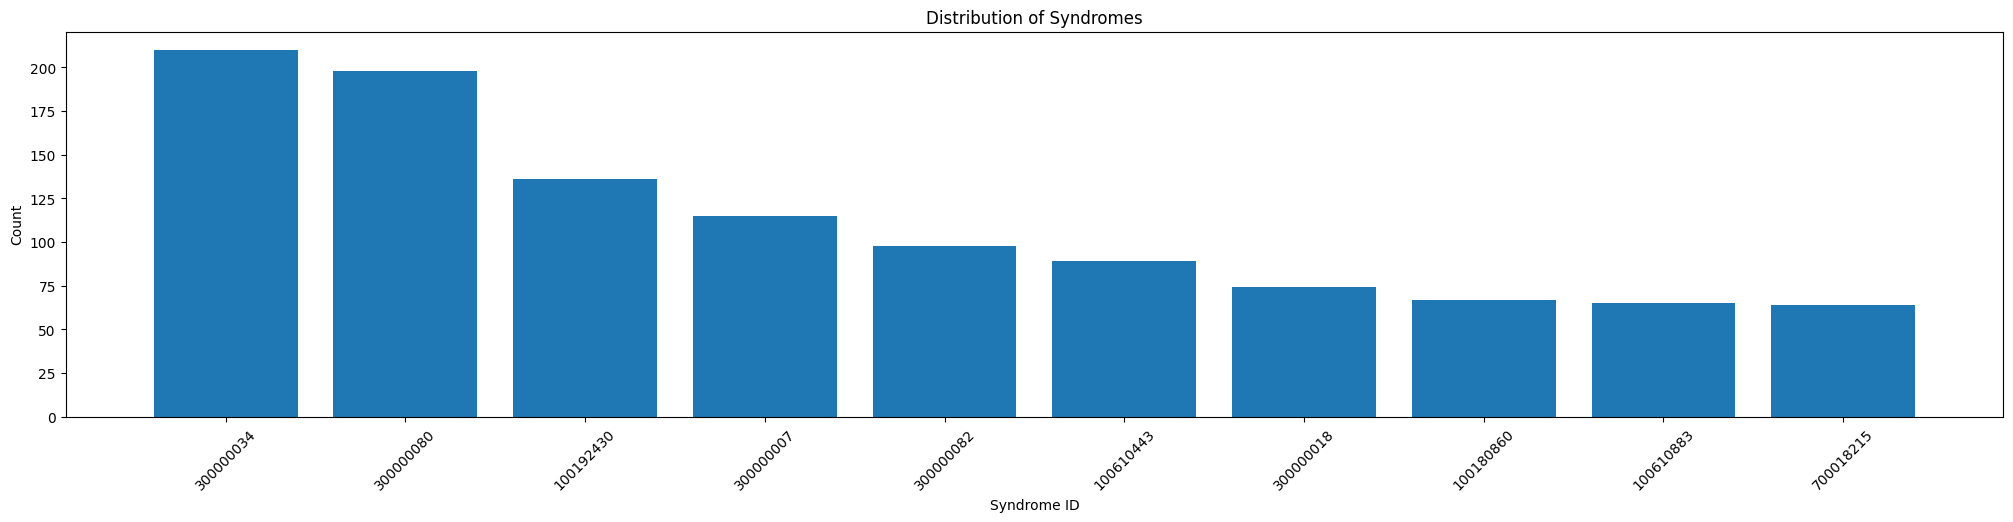

In [5]:
# Number of unique syndromes
num_syndromes = df['syndrome_id'].nunique()

# Number of unique images per syndromes
images_per_syndrome = df['syndrome_id'].value_counts()

print(f"Number of syndromes: {num_syndromes}")
print(f"Images per syndrome: \n{images_per_syndrome}")

# Vizualize the number of unique images per syndromes
plt.figure(figsize=(25, 5))  
plt.bar(images_per_syndrome.index, images_per_syndrome.values)  
plt.xticks(rotation=45)  
plt.title('Distribution of Syndromes')  
plt.xlabel('Syndrome ID')  
plt.ylabel('Count') 

plt.savefig('../data/images/syndrome_bar.png', bbox_inches='tight')

plt.show()

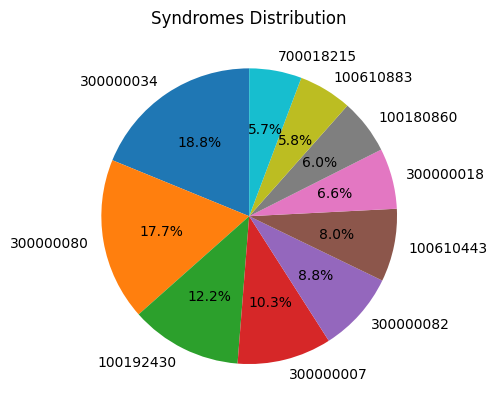

In [6]:
# Vizualize the distribution of unique images per syndromes
counts = df['syndrome_id'].value_counts()

plt.pie(counts.values, labels=counts.index.astype(str), autopct='%1.1f%%', startangle=90)
plt.title('Syndromes Distribution')

plt.savefig('../data/images/syndrome_pie.png', bbox_inches='tight')

plt.show()


### Subject

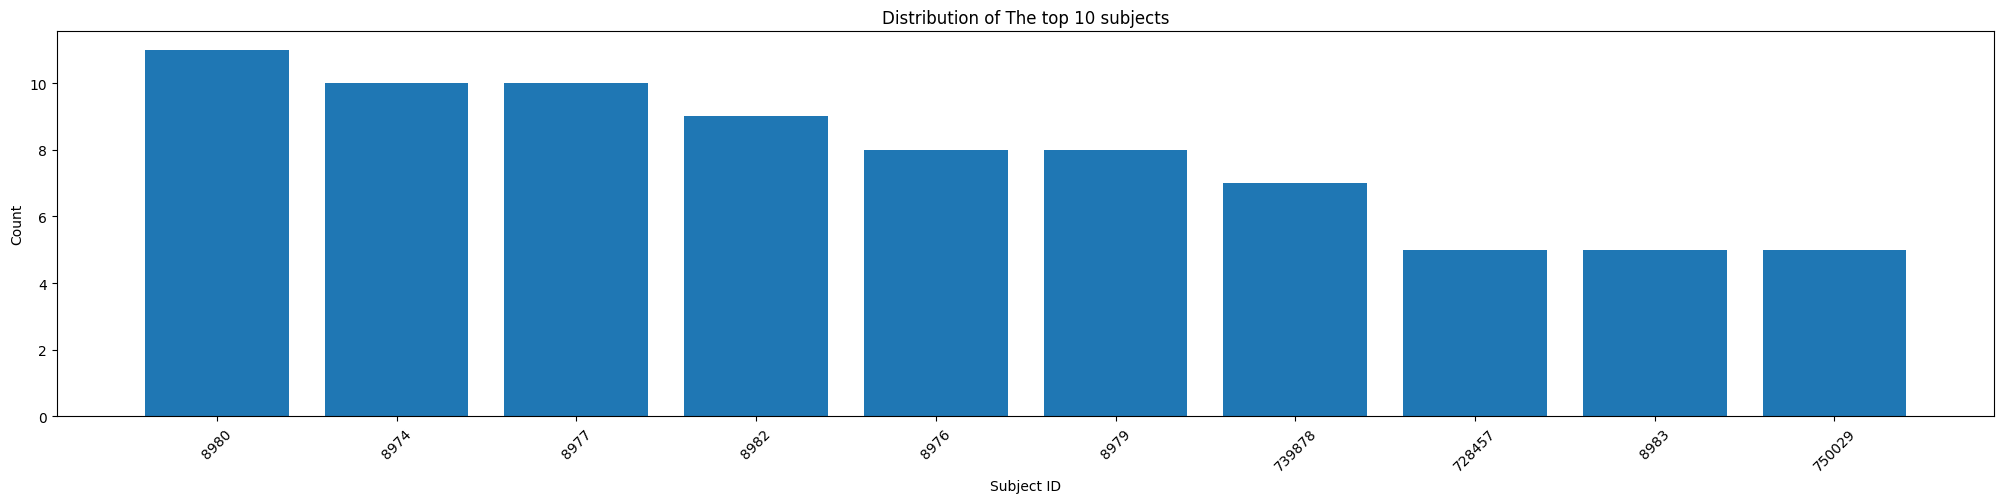

In [7]:
top_subjects = df['subject_id'].value_counts().head(10)

# Visualize the distributions of the top 10 subjects
plt.figure(figsize=(25, 5))  
plt.bar(top_subjects.index, top_subjects.values)  
plt.xticks(rotation=45)  
plt.title('Distribution of The top 10 subjects')  
plt.xlabel('Subject ID')  
plt.ylabel('Count')  

plt.savefig('../data/images/subject_bar.png', bbox_inches='tight')

plt.show()  

### Embeddings

C:\Users\dighz\AppData\Local\Temp\ipykernel_30744\3671249476.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', len(df['syndrome_id'].unique()))


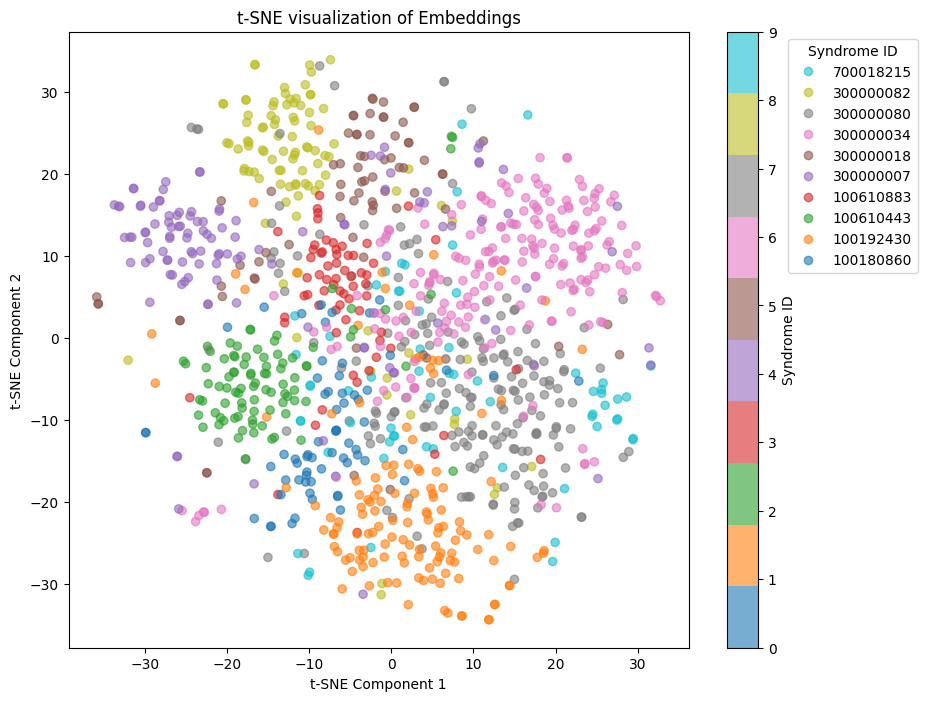

In [8]:
# Applying  t-SNE for dimensionality reduction to understand patterns and relationships
embeddings = df.iloc[:, 3:].values  


tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

df['tsne_x'] = embeddings_2d[:, 0]
df['tsne_y'] = embeddings_2d[:, 1]

df['syndrome_id_code'] = df['syndrome_id'].astype('category').cat.codes

cmap = plt.cm.get_cmap('tab10', len(df['syndrome_id'].unique()))

# Visualize with distinct colors based on syndrome_id
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['tsne_x'], df['tsne_y'], c=df['syndrome_id_code'], cmap=cmap, alpha=0.6)
plt.title("t-SNE visualization of Embeddings")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label='Syndrome ID')

handles, _ = scatter.legend_elements()
labels = list(df['syndrome_id'].astype('category').cat.categories)

handles_reversed = handles[::-1]
labels_reversed = labels[::-1]

plt.legend(handles=handles_reversed, labels=labels_reversed, title="Syndrome ID", bbox_to_anchor=(1.15, 1), loc='upper left')

plt.savefig('../data/images/syndrome_tsne.png', bbox_inches='tight')

plt.show()


In [9]:
# Checking the distribution of the data
# To see if we ne to normalize the data or remove outliers 


mean_values = np.mean(df.iloc[:, 3:], axis=0)
std_values = np.std(df.iloc[:, 3:], axis=0) 

df_stats = pd.DataFrame({"Mean": mean_values, "Std": std_values})

print(df_stats.describe())

             Mean         Std
count  323.000000  323.000000
mean     0.015546    1.268874
std      0.445247    1.101767
min     -1.207172    0.961862
25%     -0.242507    1.120811
50%     -0.015182    1.167837
75%      0.233324    1.226491
max      4.789427   15.397184


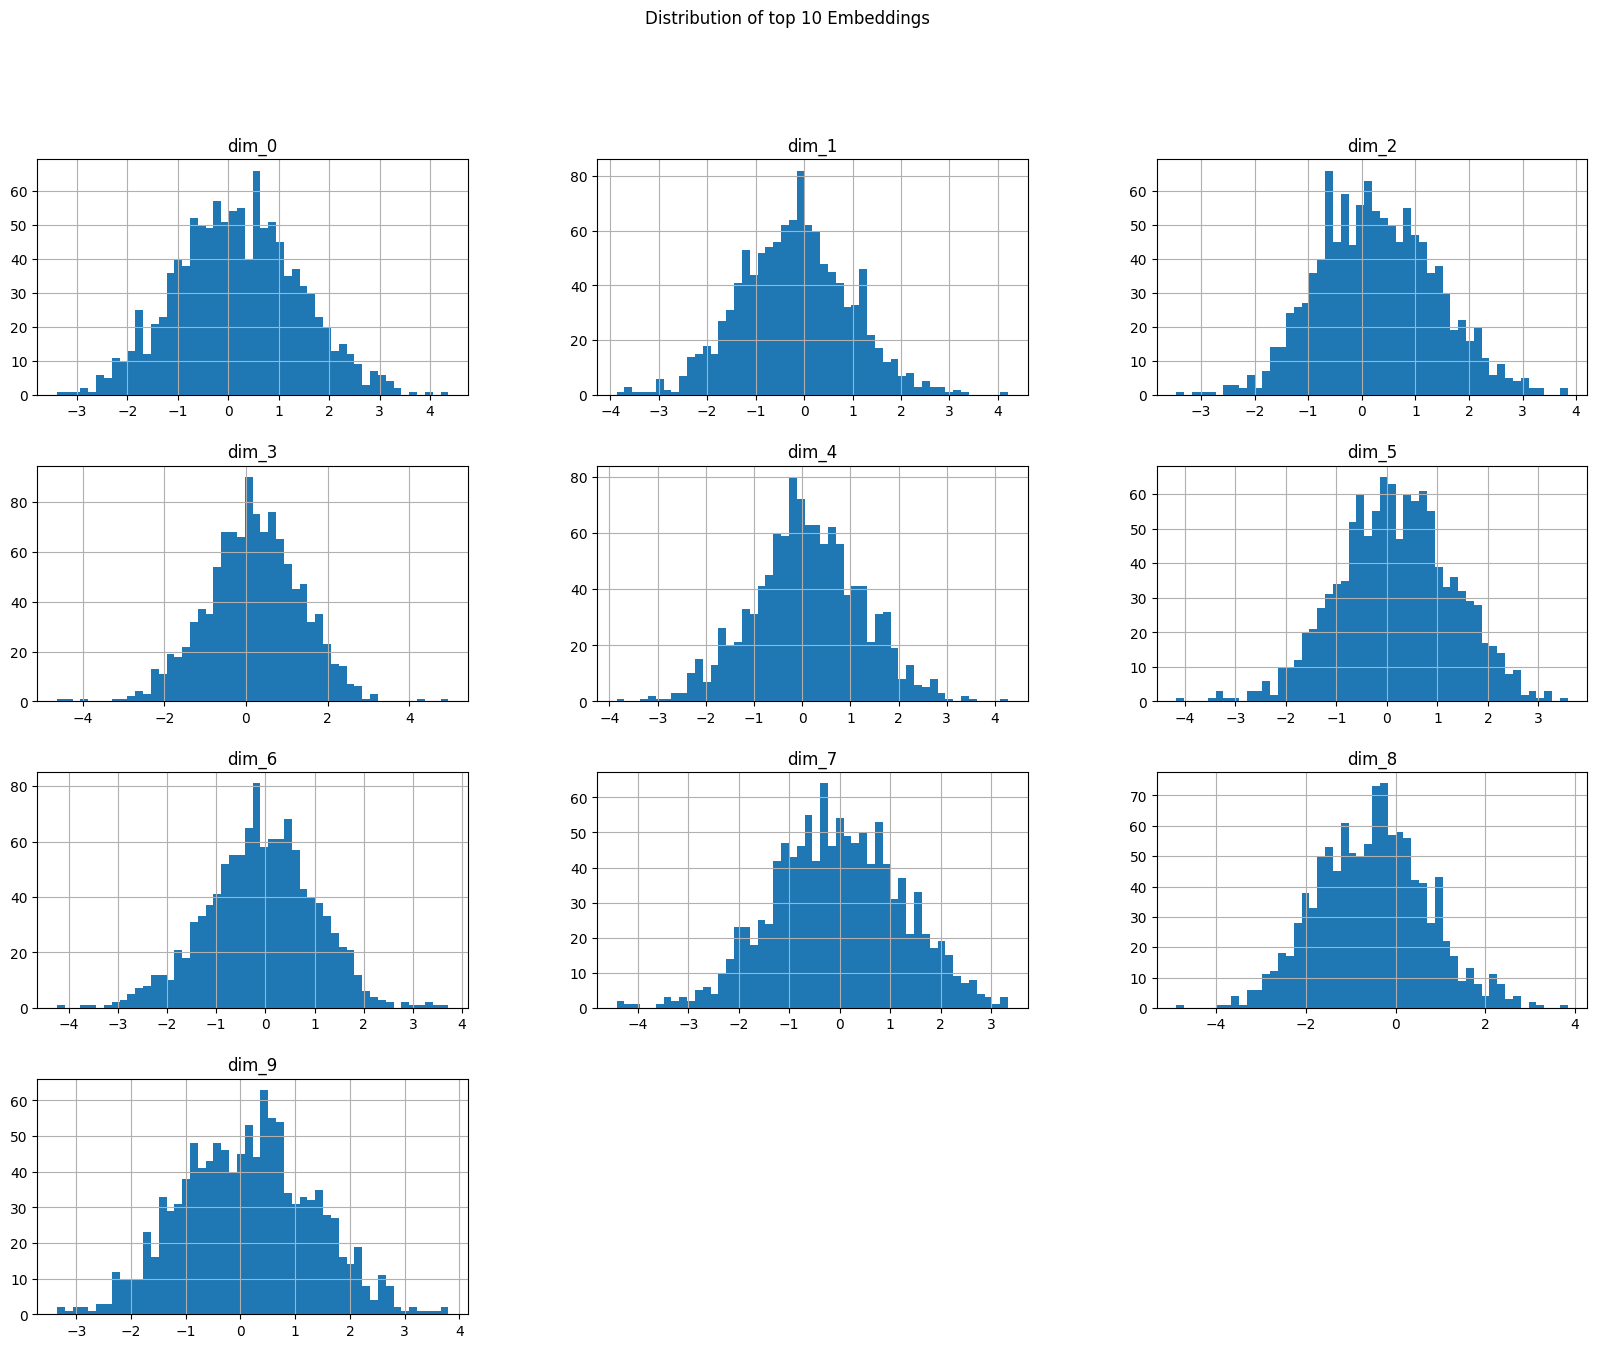

In [10]:
df.iloc[:, 3:13].hist(bins=50, figsize=(20, 15))
plt.suptitle("Distribution of top 10 Embeddings")
plt.show()


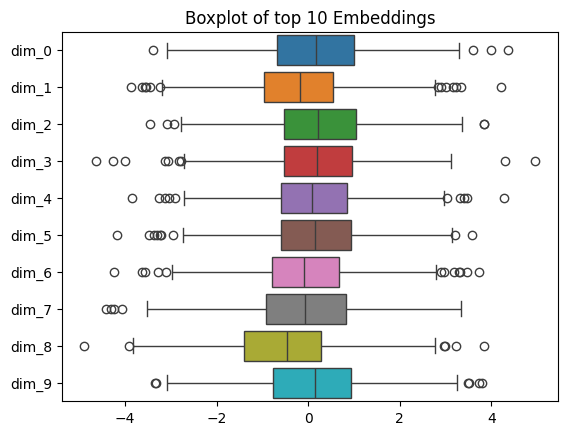

In [11]:
sns.boxplot(data=df.iloc[:, 3:13], orient="h")
plt.title("Boxplot of top 10 Embeddings")
plt.show()
